<h3 align="center">Linear Equation</h3>
<hr color="6463ef">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from IPython.display import clear_output

<img align="left" src="https://www.mathsisfun.com/algebra/images/y-mxpb-graph.svg"/>
<img align="right" src ="https://www.mathsisfun.com/algebra/images/y-mxpb.svg"/>
<br><br><br>
<h5 align="right">M = Gradient &nbsp&nbsp&nbsp&nbsp&nbsp
B = Intercept</h5>

<h5 align="right">Getting the data</h5>

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/houses_price.csv")
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [6]:
df.isna().value_counts()

Home   Price  SqFt   Bedrooms  Bathrooms  Offers  Brick  Neighborhood
False  False  False  False     False      False   False  False           128
dtype: int64

In [7]:
df.isnull().value_counts()

Home   Price  SqFt   Bedrooms  Bathrooms  Offers  Brick  Neighborhood
False  False  False  False     False      False   False  False           128
dtype: int64

<h5 align="right">Show the Prices x Area</h5>

Text(0.5, 0, 'Price')

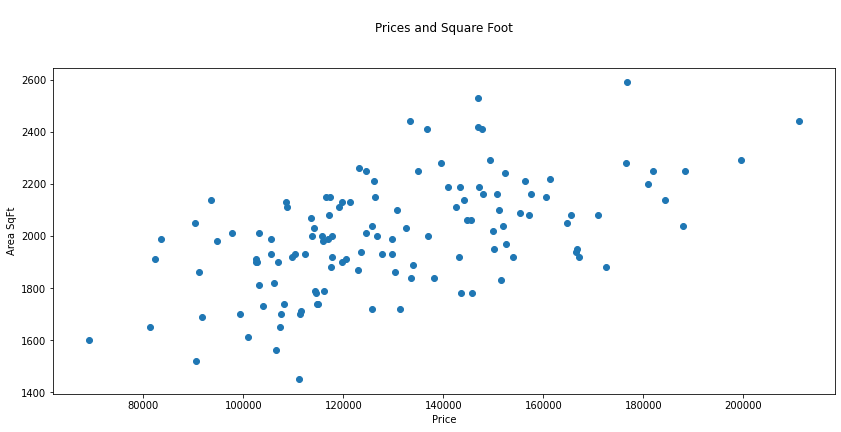

In [8]:
%matplotlib inline
plt.figure(figsize=[14,6])
plt.scatter(df.Price, df.SqFt)
plt.title('\nPrices and Square Foot\n\n')
plt.ylabel('Area SqFt')
plt.xlabel('Price')

<h5 align="center">Linear Regression to Predict values</h5>
<hr size='5' color="6463ef">

<h5>Predict the area  of a house with the given price</h5>

In [9]:
regPrice = linear_model.LinearRegression()
regPrice.fit(df[['Price']],df['SqFt']) #define X and Y

LinearRegression()

In [17]:
n = input('Choose a Price and it will precidt the area in sq ft: ')
price = regPrice.predict([[n]]) #put the X value and receive the Y value

print('\n\nthe average Area available for this price is: {}\n\n\n'.format(price))


Choose a Price and it will precidt the area in sq ft: 12000


the average Area available for this price is: [1485.26442149]





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [18]:
#y=mx+b and the intercept is 'b'
regPrice.intercept_

1433.012325427407

In [20]:
#y=mx+b and the coefficient is 'm'
regPrice.coef_

array([0.00435434])

<h5>Predict price of a house with the given area</h5>

In [21]:
regArea = linear_model.LinearRegression()
regArea.fit(df[['SqFt']],df['Price']) #define X and Y

n = input('\nChoose a Area (in Square Foot)\n and it will precidt the overall Price: ')
area = regArea.predict([[n]]) #put the X value and receive the Y value
print('\n\nthe overall Price for this area is: {}\n\n'.format(area))


Choose a Area (in Square Foot)
 and it will precidt the overall Price: 35000


the overall Price for this area is: [2447830.00859186]




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


<h5>Compare the results</h5>

In [22]:
df_new = pd.DataFrame(df['SqFt'])
col=['Area']
df_new.columns=col
df_new.head()

,Area
0,1790
1,2030
2,1740
3,1980
4,2130


In [ ]:
area = regArea.predict(df_new)
df_new['Predctd Prices'] = area

In [25]:
df_new['Real Prices'] = df['Price']
df_new.head()

,Area,Predctd Prices,Real Prices
0,1790,115613.979746,114300
1,2030,132468.296124,114200
2,1740,112102.663833,114800
3,1980,128956.980212,94700
4,2130,139490.927948,119800


In [26]:
df_new['Prices=/='] = (df_new['Real Prices']-df_new['Predctd Prices'])
df_new.head()

,Area,Predctd Prices,Real Prices,Prices=/=
0,1790,115613.979746,114300,-1313.979746
1,2030,132468.296124,114200,-18268.296124
2,1740,112102.663833,114800,2697.336167
3,1980,128956.980212,94700,-34256.980212
4,2130,139490.927948,119800,-19690.927948


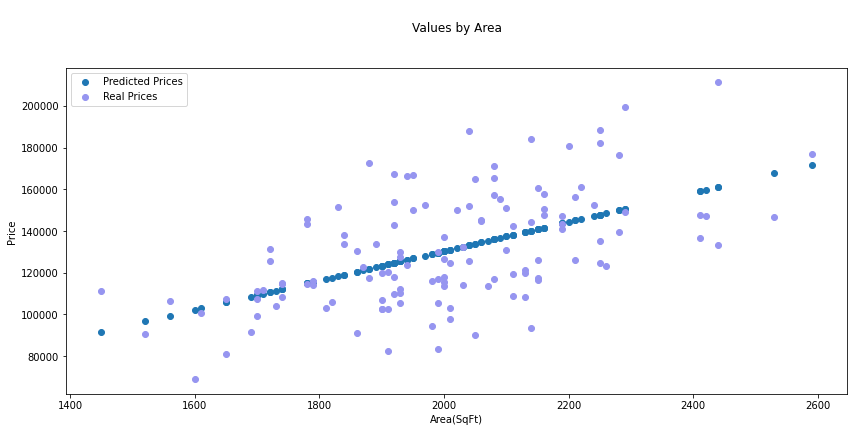

In [27]:
plt.figure(figsize=[14,6])
plt.scatter(df_new['Area'],df_new['Predctd Prices'], label='Predicted Prices')
plt.scatter(df_new['Area'],df_new['Real Prices'], label='Real Prices', color='#9695f0')
plt.xlabel('Area(SqFt)')
plt.ylabel('Price')
plt.title('\nValues by Area\n\n')
plt.legend(loc='upper left')


<h5>Prediction by Neighborhoods</h5>

In [ ]:
north = (df['Neighborhood']=='North')
north=df[north]
regN=linear_model.LinearRegression()
regN.fit(north[['SqFt']], north['Price'])

north=pd.DataFrame(north['SqFt'])
col=['Area']
north.columns=col
value = regN.predict(north)
north['Values North Predictd'] = value


In [30]:
north.head()

,Area,Values North Predictd
5,1780,104640.747736
12,1910,109879.771482
13,2150,119551.815321
17,1990,113103.786095
21,2000,113506.787922


In [31]:
df_new['North Predctd'] = north['Values North Predictd']

In [32]:
west = (df['Neighborhood']=='West')
west=df[west]
regW=linear_model.LinearRegression()
regW.fit(west[['SqFt']], west['Price'])
west=pd.DataFrame(west['SqFt'])
col=['Area']
west.columns=col
value = regW.predict(west)
west['Values west Predictd'] = value
df_new['West Predctd'] = west['Values west Predictd']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Area
Feature names seen at fit time, yet now missing:
- SqFt

  warnings.warn(message, FutureWarning)


In [33]:
east = (df['Neighborhood']=='East')
east=df[east]
regE=linear_model.LinearRegression()
regE.fit(east[['SqFt']], east['Price'])
east=pd.DataFrame(east['SqFt'])
col=['Area']
east.columns=col
value = regE.predict(east)
east['Values East Predictd'] = value
df_new['East Predctd'] = east['Values East Predictd']

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Area
Feature names seen at fit time, yet now missing:
- SqFt

  warnings.warn(message, FutureWarning)


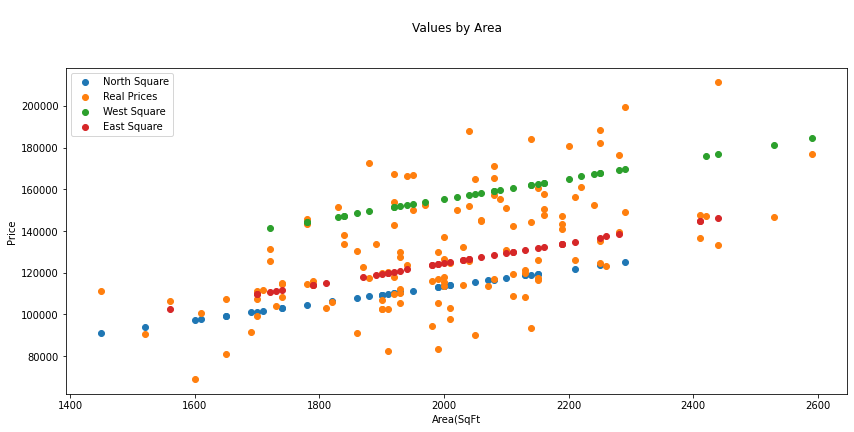

In [36]:
plt.figure(figsize=[14,6])
plt.scatter(df_new['Area'], df_new['North Predctd'], label='North Square')
plt.scatter(df_new['Area'], df_new['Real Prices'], label='Real Prices')
plt.scatter(df_new['Area'], df_new['West Predctd'], label='West Square')
plt.scatter(df_new['Area'], df_new['East Predctd'], label='East Square')

plt.xlabel('Area(SqFt')
plt.ylabel('Price')
plt.title('\nValues by Area\n\n')
plt.legend(loc='upper left')

<h5 align="center">Difference of Values</h5>
<hr size='5' color='6463ef'>

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            128 non-null    int64  
 1   Predctd Prices  128 non-null    float64
 2   Real Prices     128 non-null    int64  
 3   Prices=/=       128 non-null    float64
 4   North Predctd   44 non-null     float64
 5   West Predctd    39 non-null     float64
 6   East Predctd    45 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 7.1 KB


In [47]:
#Fill NaN and parse to Integer
df_new['Predctd Prices'] = df_new['Predctd Prices'].apply(np.int64)
df_new['Prices=/='] = df_new['Prices=/='].apply(np.int64)
df_new['North Predctd'] = df_new['North Predctd'].fillna(0).apply(np.int64)
df_new['West Predctd'] = df_new['West Predctd'].fillna(0).apply(np.int64)
df_new['East Predctd'] = df_new['East Predctd'].fillna(0).apply(np.int64)

In [53]:
df_new.head()

,Area,Predctd Prices,Real Prices,Prices=/=,North Predctd,West Predctd,East Predctd
0,1790,115613,114300,-1313,0,0,114159
1,2030,132468,114200,-18268,0,0,126021
2,1740,112102,114800,2697,0,0,111687
3,1980,128956,94700,-34256,0,0,123550
4,2130,139490,119800,-19690,0,0,130964


In [54]:
Nsttcs = (df_new['Real Prices'] - df_new['North Predctd'])
Nsttcs.describe()

count       128.000000
mean      92561.984375
std       70756.605193
min      -29503.000000
25%        7325.750000
50%      120150.000000
75%      147250.000000
max      211200.000000
dtype: float64

In [56]:
Wsttcs = (df_new['Real Prices'] - df_new['West Predctd'])
Wsttcs.describe()

count       128.000000
mean      81892.335938
std       57307.898971
min      -34553.000000
25%       15808.000000
50%      107400.000000
75%      121725.000000
max      157100.000000
dtype: float64

In [55]:
Esttcs = (df_new['Real Prices'] - df_new['East Predctd'])
Esttcs.describe()

count       128.000000
mean      86400.960938
std       68934.993809
min      -37790.000000
25%        6081.000000
50%      108350.000000
75%      143750.000000
max      211200.000000
dtype: float64

<hr size="10" color="6463ef">

<h5 align='right'>An example much more easy</h5>

In [117]:
df2 = pd.DataFrame([	[2600,	550000],
	[3000,		565000],
	[3200,		610000],
	[3600,		680000],
	[4000,		725000]],
  columns=['Area', 'Price'])

In [142]:
reg = linear_model.LinearRegression()
reg.fit(df2[['Price']],df2['Area'])

LinearRegression()

In [143]:
reg.predict([[0]]) #put X and receive Y

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-1138.49577214])

In [129]:
reg.coef_

array([0.0070583])

In [130]:
reg.intercept_

-1138.4957721406317